> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Miguel Antônio Ribeiro e Silva
* **Matrícula:**  4680

# Aula Prática 10
## Aprendizado de Máquina Não-Supervisionado - Clustering
**Objetivo:** Utilizar a biblioteca scikit-learn para treinar e testar modelos de aprendizado não-supervisionado

**Pré-requisitos:** Linguagem de programação Python, Linux, estatística

**Meta**: Ao final da prática, o aluno será capaz de preparar dados e criar modelos de agrupamento

In [271]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

#!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p10/weatherHistory.csv

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets, cluster
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_10 import *

print("Setup complete.")

Setup complete.


------
## Roteiro

### Ler o conjunto de dados
O conjunto de dados que iremos utilizar é o **iris dataset**, que é um dataset clássico no treinamento em Inteligência Artificial. Os dados estão disponíveis diretamente na biblioteca `scikit-learn`.

In [274]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Converte a coluna target para int
iris_df['target'] = iris_df['target'].astype('int64')

In [275]:
X_columns = [u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)', u'petal width (cm)']
X = iris_df[X_columns]

### Visualizar os dados

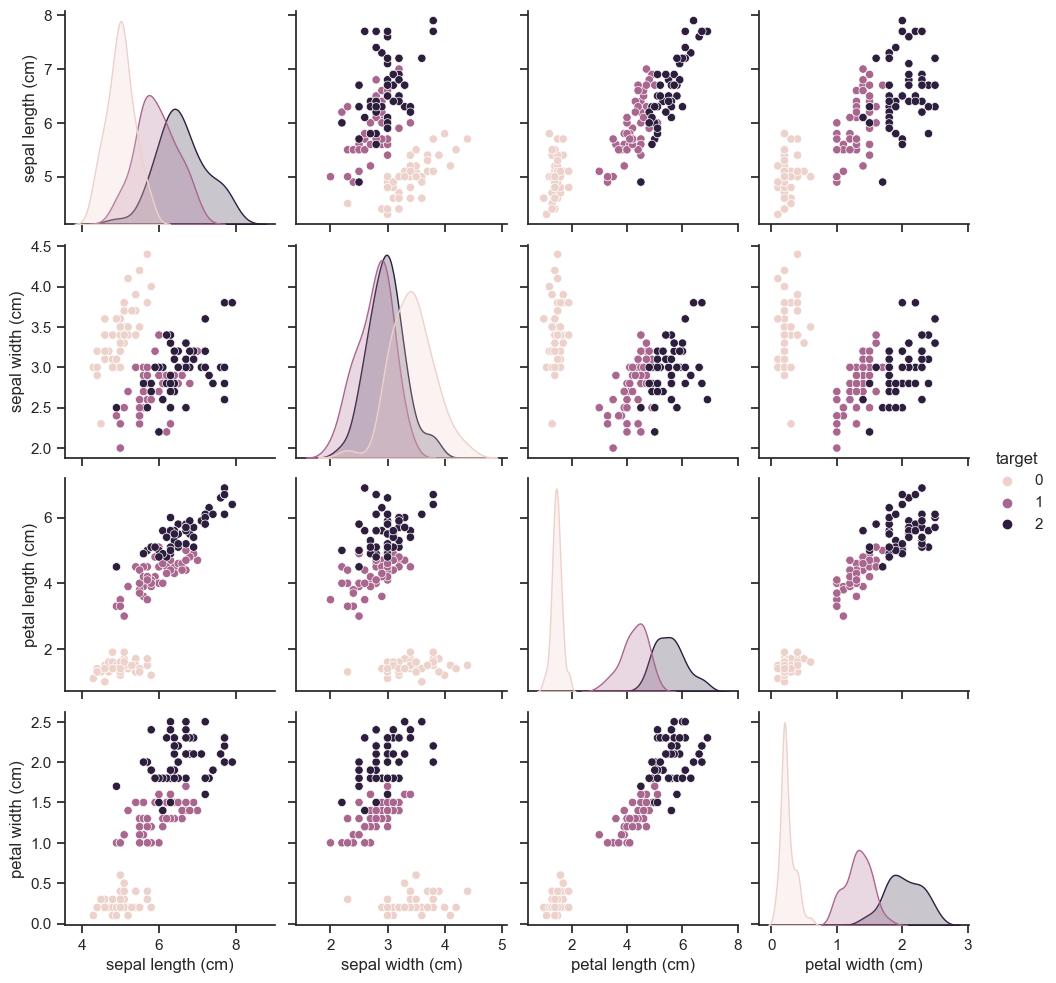

In [276]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue='target')
plt.show()

### Agrupar os dados utilizando o `K-Means`

Com 3 clusters.

In [277]:
k_means = cluster.KMeans(n_clusters=3, n_init=10)
k_means.fit(X)

C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

### Comparar os centros das classes reais com os grupos identificados pelo k-means

**Atenção:** a ordem dos grupos do k-means não é necessariamente a mesma do target (0, 1 e 2). Temos que olhar para um grupo, independente da ordem do label que o k-means atribuiu.

In [278]:
print(k_means.cluster_centers_)

iris_df.groupby('target')[X_columns]

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


### Visualizar os grupos em termos de dois atributos
**Atenção**: as cores dos dois gráficos podem ser diferentes, pois o rótulo do agrupamento do k-means pode não ser igual ao do target real. Nesses gráficos, o objetivo é visualizar os grupos, sem se atentar para a cor.

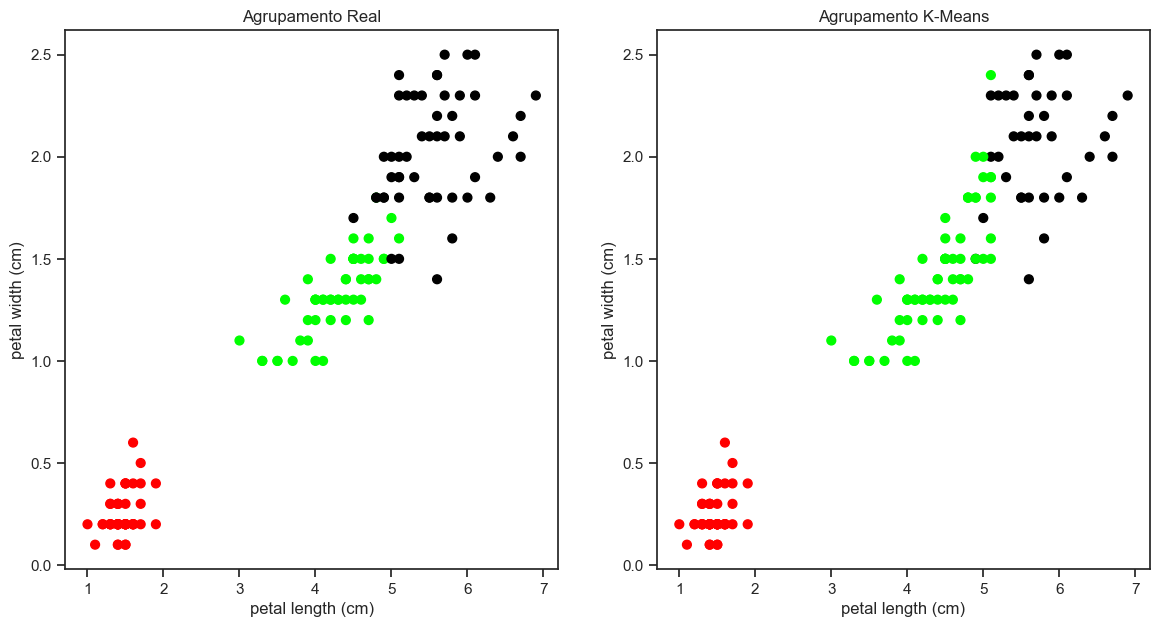

In [279]:
# Ajusta o tamanho do gráfico a ser plotado
plt.figure(figsize=(14, 7))

cmap_real = np.array(['red', 'lime', 'black'])
cmap_group = np.array(['purple', 'orange', 'green'])

# Agrupamentos originais/reais
plt.subplot(1, 2, 1)
plt.scatter(x=iris_df[u'petal length (cm)'], y=iris_df[u'petal width (cm)'], c=cmap_real[iris_df[u'target']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Agrupamentos originais/reais
plt.subplot(1, 2, 2)
plt.scatter(x=iris_df[u'petal length (cm)'], y=iris_df[u'petal width (cm)'], c=cmap_real[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

----
# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Utilize técnicas de aprendizado de máquina não-supervisionado para agrupar os dados visando separar os mesmos de acordo com o tipo de precipitação ("Precip Type"), usando outras variáveis. Atenção: lembre de remover a variável "Precip Type" dos atributos a serem utilizados para agrupar. Ela deve ser utilizada apenas para a comparação.

## 1. Leia o arquivo `weatherHistory.csv`
Armazene-os nas variável `df`.

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [280]:
# q1.hint()

df = pd.read_csv('weatherHistory.csv')

q1.check()
df

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## 2. Utilize o K-means para separar os dados em grupos distintos, desconsiderando o tipo de precipitação.

Plote quaisquer gráficos que você julgue utéis para visualizar os grupos.

Essa questão não possui verificação automática mas você pode pedir dicas com `q2.hint()`

In [281]:
# Cópia do dataframe

dfCopy = df.copy()

# Mudando o tipo de precipitação para numérico
dfCopy['Precip Type'] = dfCopy['Precip Type'].replace('rain', 0)
dfCopy['Precip Type'] = dfCopy['Precip Type'].replace('snow', 1)

# Dropando os que é NaN
dfCopy = dfCopy.dropna()

dfCopy.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,0.0,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,0.0,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,0.0,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,0.0,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,0.0,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [282]:
# Pegando as colunas de interesse
colunasInteresse = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

X = dfCopy[colunasInteresse]

# Converte Precip Type para int
dfCopy['Precip Type'] = dfCopy['Precip Type'].astype('int64')

In [283]:
# Normalizando os dados
X_norm = (X - X.min()) / (X.max() - X.min())

X_norm

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.506975,0.523486,0.89,0.221130,0.699164,0.983,0.970135
1,0.505085,0.521084,0.86,0.223399,0.721448,0.983,0.970613
2,0.505445,0.553144,0.89,0.061523,0.568245,0.929,0.970909
3,0.487805,0.501947,0.83,0.220877,0.749304,0.983,0.971358
4,0.495365,0.517356,0.83,0.172970,0.721448,0.983,0.971454
...,...,...,...,...,...,...,...
96448,0.774998,0.801259,0.43,0.172214,0.086351,1.000,0.969399
96449,0.751778,0.779886,0.48,0.158094,0.055710,0.966,0.970164
96450,0.710557,0.741944,0.56,0.140696,0.083565,1.000,0.970642
96451,0.702187,0.734239,0.60,0.164902,0.055710,1.000,0.970919


In [284]:
# Agrupando os dados, com 2 clusters
k_means = cluster.KMeans(n_clusters=2, n_init=10)
k_means.fit(X_norm)

KMeans(n_clusters=2, n_init=10)

Text(0, 0.5, 'Wind Speed (km/h)')

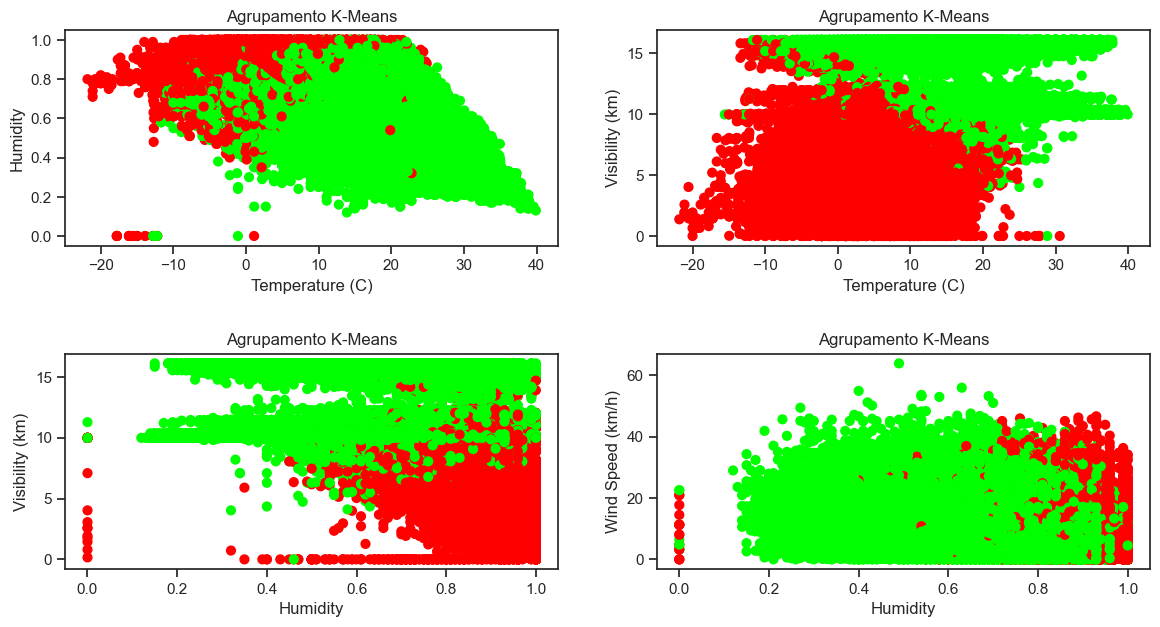

In [285]:
# Agrupamento real
plt.figure(figsize=(14, 7))

cmap = np.array(['red', 'lime', 'blue'])



# Agrupamentos | Temperature (C) x Humidity |

plt.subplot(2, 2, 1)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Humidity'], c=cmap[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

# Agrupamentos | Temperatura (C) x Visibility (km) |

plt.subplot(2, 2, 2)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Visibility (km)'], c=cmap[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')

plt.subplots_adjust(hspace=0.5)

# Agrupamentos | Humidity x Visibility (km) |

plt.subplot(2, 2, 3)
plt.scatter(x=dfCopy['Humidity'], y=dfCopy['Visibility (km)'], c=cmap[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Humidity')
plt.ylabel('Visibility (km)')


# Agrupamentos | Humidity x Wind Speed (km/h) |

plt.subplot(2, 2, 4)
plt.scatter(x=dfCopy['Humidity'], y=dfCopy['Wind Speed (km/h)'], c=cmap[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')

## 3. Veja se é possível associar cada grupo gerado pelo K-means a um tipo de precipitação diferente, olhando para o tipo de precipitação real.
Plote quaisquer gráficos que você julgue utéis para visualizar os grupos.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

              precision    recall  f1-score   support

           0       0.73      0.29      0.42     85224
           1       0.02      0.12      0.04     10712

    accuracy                           0.28     95936
   macro avg       0.37      0.21      0.23     95936
weighted avg       0.65      0.28      0.38     95936



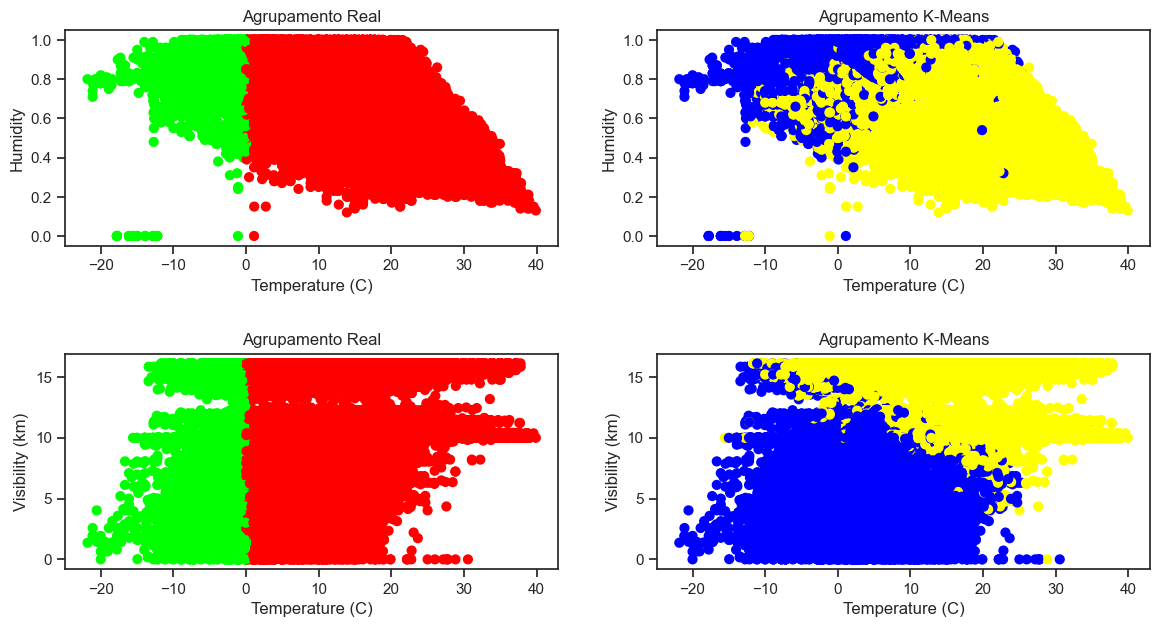

In [286]:
from sklearn.metrics import classification_report


# Agrupamento real
plt.figure(figsize=(14, 7))

cmap_real = np.array(['red', 'lime'])
cmap_kmeans = np.array(['blue', 'yellow'])

# Agrupamentos | Temperature (C) x Humidity |

# Real
plt.subplot(2, 2, 1)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Humidity'], c=cmap_real[dfCopy['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

# K-Means
plt.subplot(2, 2, 2)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Humidity'], c=cmap_kmeans[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

# Agrupamentos | Temperatura (C) x Visibility (km) |

# Real
plt.subplot(2, 2, 3)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Visibility (km)'], c=cmap_real[dfCopy['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')
plt.subplots_adjust(hspace=0.5)

# K-Means
plt.subplot(2, 2, 4)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Visibility (km)'], c=cmap_kmeans[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')
plt.subplots_adjust(hspace=0.5)

print(classification_report(dfCopy['Precip Type'], k_means.labels_))

# Definitivamente não é possível associar cada grupo gerado pelo K-means a um tipo de precipitação diferente, olhando para o tipo de precipitação real.

## 4. Faça testes com diferentes atributos para verificar se existem sub-conjuntos de atributos mais adequados para agrupar os dados

Explore **pelo menos** quatro cenários distintos. Utilize o [cálculo da silhueta](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) para verificar a qualidade dos grupos obtidos.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

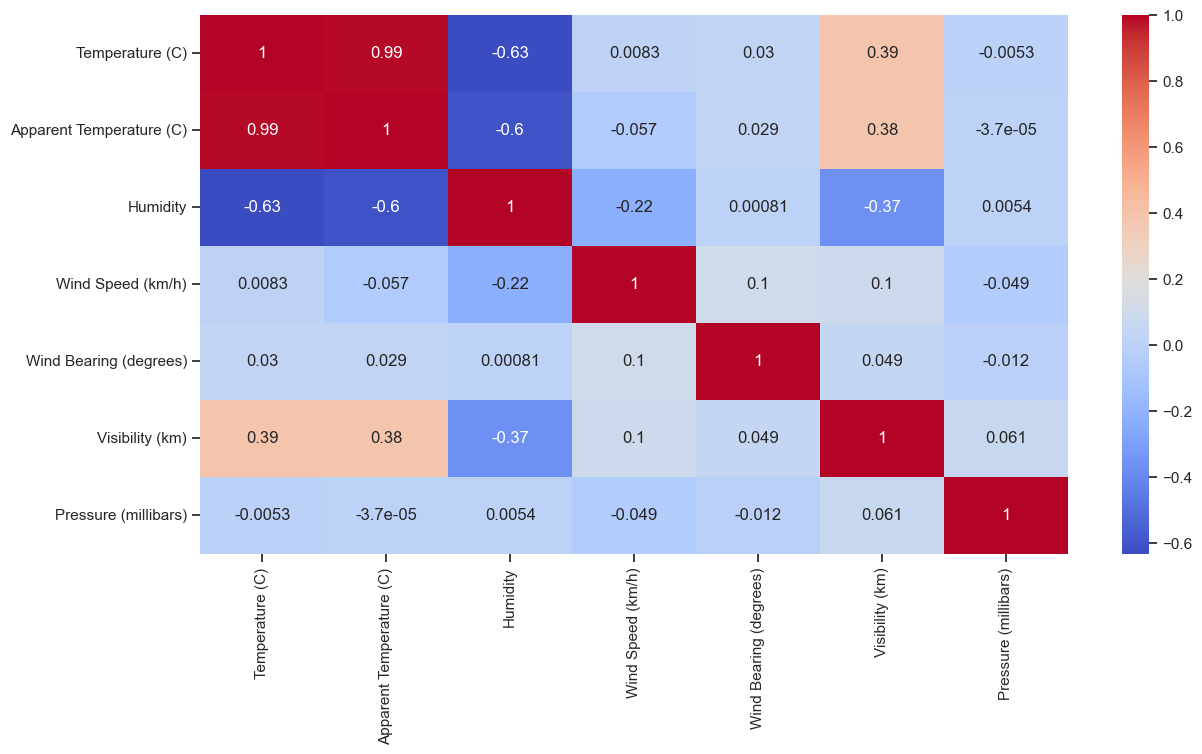

In [287]:
# Grafico de correlação

plt.figure(figsize=(14, 7))
sns.heatmap(X_norm.corr(), annot=True, cmap='coolwarm')
plt.show()

Para n_clusters = 2 A média da silhueta é : 0.522739801470184


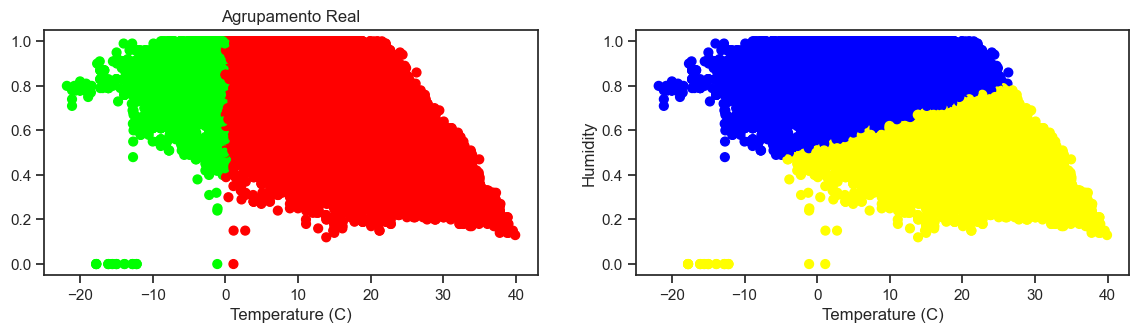

In [288]:
from sklearn.metrics import silhouette_score

# Cenário 1

# Agrupando os dados, | Temperature (C) x Humidity |

TempHum = X_norm[['Temperature (C)', 'Humidity']]
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(TempHum)


plt.figure(figsize=(14, 7))

# Agrupamento real
plt.subplot(2, 2, 1)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Humidity'], c=cmap_real[dfCopy['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Temperature (C)')

# K-Means
plt.subplot(2, 2, 2)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Humidity'], c=cmap_kmeans[kmeans.labels_], s=40)
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

# Silhouette
silhouette_avg = silhouette_score(TempHum, kmeans.labels_)
print("Para n_clusters =", 2,
      "A média da silhueta é :", silhouette_avg)

### Resposta da 4: - Cenário 1

**Cenário:** {{ Humidity x Temperature (C) }}

**Justificativa:** {{ Possuem uma correlação de -0.63, é uma correlação forte negativa, o que indica que quando uma variável aumenta a outra diminui. A média da silhueta é : 0.522739801470184 que é indicativo de um agrupaento razoável, com uma sobreposição significativa. }}

Para n_clusters = 2 A média da silhueta é : 0.46587486580629545


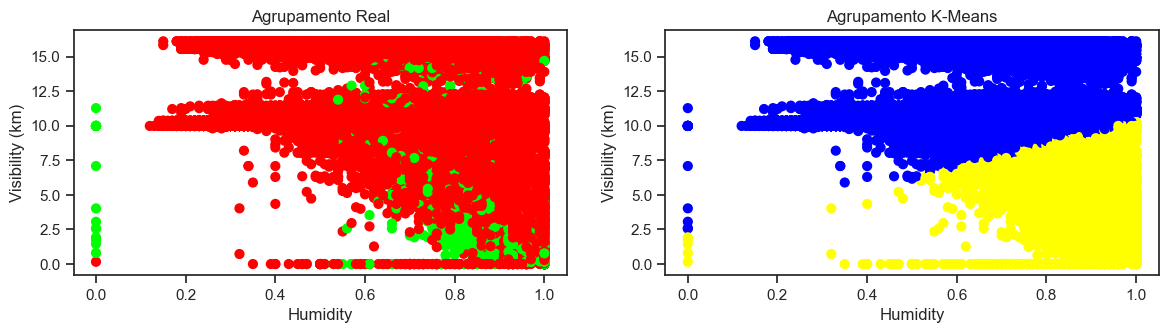

In [289]:
# Resposta da 4: - Cenário 2
# Agrupando os dados, | Humidity x Visibility (km) |

HumVis = X_norm[['Humidity', 'Visibility (km)']]
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(HumVis)


plt.figure(figsize=(14, 7))

# Agrupamento real
plt.subplot(2, 2, 1)
plt.scatter(x=dfCopy['Humidity'], y=dfCopy['Visibility (km)'], c=cmap_real[dfCopy['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Visibility (km)')

# K-Means
plt.subplot(2, 2, 2)
plt.scatter(x=dfCopy['Humidity'], y=dfCopy['Visibility (km)'], c=cmap_kmeans[kmeans.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Humidity')
plt.ylabel('Visibility (km)')

# Silhouette
silhouette_avg = silhouette_score(HumVis, kmeans.labels_)
print("Para n_clusters =", 2,
      "A média da silhueta é :", silhouette_avg)

### Resposta da 4: - Cenário 2

**Cenário:** {{ Humidity x Visibility (km) }}

**Justificativa:** {{ Possuem uma correlação de -0.37 que é uma correlação razoavelmente fraca negativa, o que indica que quando uma variável aumenta a outra diminui. A média da silhueta é : 0.4669338617484205 que é indicativo de um agrupamento razoável, com uma sobreposição significativa. }}


Para n_clusters = 2 A média da silhueta é : 0.4901613557825493


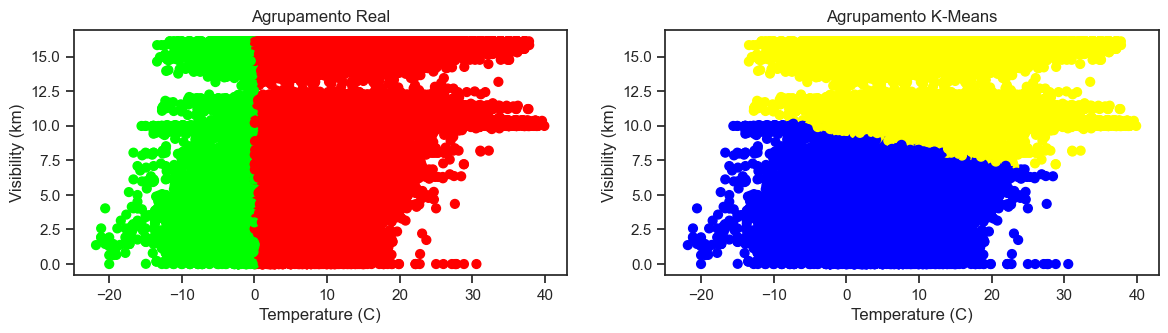

In [290]:
# Resposta da 4: - Cenário 3
# Faça o código do segundo Cenário da 4. aqui!

# Agrupando os dados, | Temperature (C) x Visibility (km) |

TempVis = X_norm[['Temperature (C)', 'Visibility (km)']]
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(TempVis)


plt.figure(figsize=(14, 7))
cmap = np.array(['red', 'lime'])

# Agrupamento real
plt.subplot(2, 2, 1)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Visibility (km)'], c=cmap_real[dfCopy['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')

# K-Means
plt.subplot(2, 2, 2)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Visibility (km)'], c=cmap_kmeans[kmeans.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')

# Silhouette
silhouette_avg = silhouette_score(TempVis, kmeans.labels_)
print("Para n_clusters =", 2,
      "A média da silhueta é :", silhouette_avg)


### Resposta da 4: - Cenário 3

**Cenário:** {{ Temperature (C) x Visibility (km) }}

**Justificativa:** {{ Possuem uma correlação de 0,39 que é uma correlação razoável positiva, o que indica que quando uma variável aumenta a outra também aumenta. A média da silhueta é : 0.498050504997286 que é indicativo de agrupamento razoável, com sobreposição significativa. }}

Para n_clusters = 2 A média da silhueta é : 0.4399749819571083


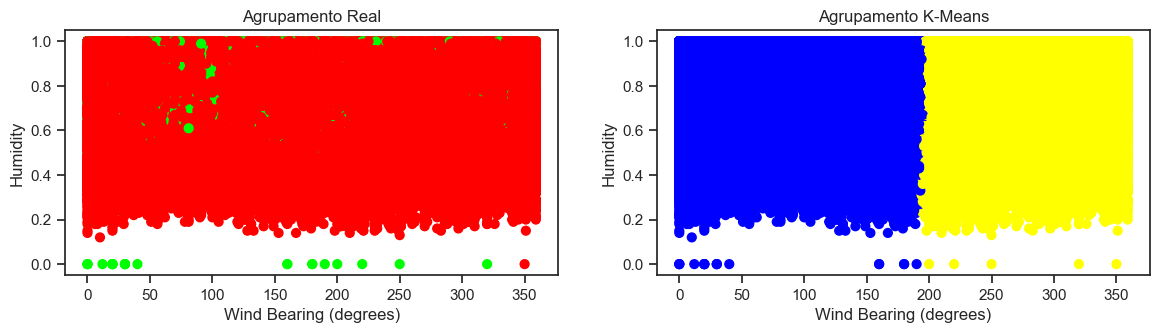

In [291]:
# Resposta da 4: - Cenário 4

# Agrupando os dados, | Wind Bearing (degrees) x Humidity |

WindHum = X_norm[['Wind Bearing (degrees)', 'Humidity']]
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(WindHum)


plt.figure(figsize=(14, 7))


# Agrupamento real
plt.subplot(2, 2, 1)
plt.scatter(x=dfCopy['Wind Bearing (degrees)'], y=dfCopy['Humidity'], c=cmap_real[dfCopy['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Humidity')

# K-Means
plt.subplot(2, 2, 2)
plt.scatter(x=dfCopy['Wind Bearing (degrees)'], y=dfCopy['Humidity'], c=cmap_kmeans[kmeans.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Humidity')

# Silhouette
silhouette_avg = silhouette_score(WindHum, kmeans.labels_)
print("Para n_clusters =", 2,
      "A média da silhueta é :", silhouette_avg)

### Resposta da 4: - Cenário 4

**Cenário:** {{ Wind Bearing (degrees) x Humidity }}

**Justificativa:** {{ Possuem uma correlação muito fraca, e a média da silhueta é : 0.44 que é indicativo de agrupamento razoável, com sobreposição significativa, é o pior cenário. }}

Para n_clusters = 2 A média da silhueta é : 0.5988583010897236


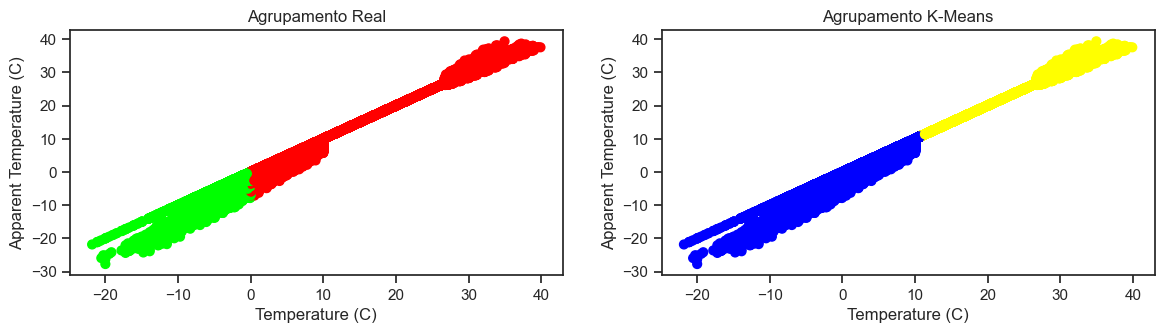

In [292]:
# Resposta da 4: - Cenário EXTRA

# Agrupando os dados, | Temperature (C) x Apparent Temperature (C) |

TempAppTemp = X_norm[['Temperature (C)', 'Apparent Temperature (C)']]
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(TempAppTemp)


plt.figure(figsize=(14, 7))


# Agrupamento real
plt.subplot(2, 2, 1)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Apparent Temperature (C)'], c=cmap_real[dfCopy['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')


# K-Means
plt.subplot(2, 2, 2)
plt.scatter(x=dfCopy['Temperature (C)'], y=dfCopy['Apparent Temperature (C)'], c=cmap_kmeans[kmeans.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')

# Silhouette
silhouette_avg = silhouette_score(TempAppTemp, kmeans.labels_)

print("Para n_clusters =", 2,
      "A média da silhueta é :", silhouette_avg)



## 5. A partir dos resultados da Questão 4, é possível observar que o coeficiente de silhueta está associado a um melhor agrupamento, ao se comparar com os dados reais?
Justifique sua resposta.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

#### Melhores cenários:

**Cenário 1:** {{ Temperature (C) x Humidity }}
**Cenário 3:** {{ Temperature (C) x Visibility (km) }}
**Cenário 2:** {{ Humidity x Visibility (km) }}
**Cenário 4:** {{ Wind Bearing (degrees) x Humidity }}

{{ Sim, é possível observar que o coeficiente de silhueta está associado a um melhor agrupamento, ao se comparar com os dados reais, pois os cenários que possuem uma correlação mais forte, possuem uma média de silhueta maior, o que indica um agrupamento melhor. }}

{{ O que é comprovado pelo Cenário EXTRA}}

**Cenário EXTRA:** {{ Temperature (C) x Apparent Temperature (C) }}






## 6. Quais métricas você pode usar para validar a acurácia do K-Means?
Justifique sua resposta.

Essa questão não possui verificação automática mas você pode pedir dicas com `q6.hint()`

### Resposta da 6.
{{ ESCREVA AQUI }}

In [293]:
# Inércia

k_means = KMeans(n_clusters=2, n_init=10, random_state=42)
k_means.fit(X_norm)

print("Inércia: ", k_means.inertia_)

Inércia:  19161.52182732264


##### Inércia: A inércia mede a soma das distâncias quadradas de cada objeto ao centróide do cluster mais próximo. Uma inércia menor indica que os objetos estão mais próximos dos centróides de seus clusters, o que é desejável para uma boa acurácia do K-Means.

In [294]:
# Indice de Rand Ajustado

from sklearn.metrics import adjusted_rand_score

print("Indice de Rand Ajustado: ", adjusted_rand_score(dfCopy['Precip Type'], k_means.labels_))

Indice de Rand Ajustado:  0.16473642173977363


##### Índice de Rand Ajustado (ARI): O ARI compara os rótulos atribuídos pelo K-Means com os rótulos reais dos dados. Ele mede a similaridade entre os agrupamentos obtidos e os agrupamentos verdadeiros, levando em consideração todas as informações de pares de objetos.

## 7. Pesquise outro algoritmo de aprendizado não-supervisionado para *clustering*, aplique para a mesma base, e compare com o K-Means
Coloque todo o código do outro algoritmo e explique completamente a sua comparação.

Essa questão não possui verificação automática mas você pode pedir dicas com `q7.hint()`

### Resposta da 7.
Foi testado com o DBSCAN, só que como ele é O(n^2) não consegui rodar, estouro de memória. Pelas minhas pesquisas é um algoritmo muito bom, mas custoso. Testei com o Birch O algoritmo Birch (Balanced Iterative Reducing and Clustering using Hierarchies) é um método de clustering hierárquico que usa uma estrutura de árvore balanceada para agrupar os dados. Ele é projetado para lidar com grandes conjuntos de dados e oferece eficiência em termos de memória.

**branching_factor**: Especifica o número máximo de subclusters que cada nó da árvore CF pode ter. Valores maiores aumentam a velocidade, mas podem levar a uma perda de precisão. O valor padrão é 50.

**n_clusters**: Define o número de clusters desejado para o resultado final. O algoritmo tentará agrupar os dados em clusters com base nesse número. No exemplo, foi definido como 2.

**threshold**: Controla a compactação dos subclusters. Valores menores produzem clusters mais compactos, enquanto valores maiores permitem clusters mais espalhados. O valor padrão é 0.5.

**compute_labels**: Define se os rótulos dos clusters serão computados ou não. Se definido como True, o algoritmo atribuirá rótulos aos clusters. No exemplo, foi definido como True.

Ele é bem rápido e o resultado, com um ARI de 0.273 foi superior ao do K-Means, que foi de 0.16.

In [295]:
# Birch Clustering

from sklearn.cluster import Birch

brc = Birch(branching_factor=50, n_clusters=2, threshold=0.5, compute_labels=True)
brc.fit(X_norm)

print("ARI do Birch: ", adjusted_rand_score(dfCopy['Precip Type'], brc.labels_))
print("ARI do K-Means: ", adjusted_rand_score(dfCopy['Precip Type'], k_means.labels_))

ARI do Birch:  0.27326304344975655
ARI do K-Means:  0.16473642173977363
